## Objective

To predict house prices

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Read the data

In [2]:
raw_data = pd.read_csv('kc_house_data.csv')
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data = raw_data.copy()

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.shape

(21613, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Dropping ID

In [7]:
data = data.drop('id',axis =1)

In [8]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
data.describe(include = 'all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


## Seperating year from date

In [10]:
data['Years']=data['date'].str.slice(0,4)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [12]:
data['Years']=data['Years'].astype(int)

In [13]:
data['Years']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: Years, Length: 21613, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [15]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Years
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [16]:
data.drop('date',axis=1,inplace=True)
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015


## Age of the house

In [17]:
data['Years']=data['Years']-data['yr_built']

In [18]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,28
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,13
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,19
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,52
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,55
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,12


## EDA using heatmap

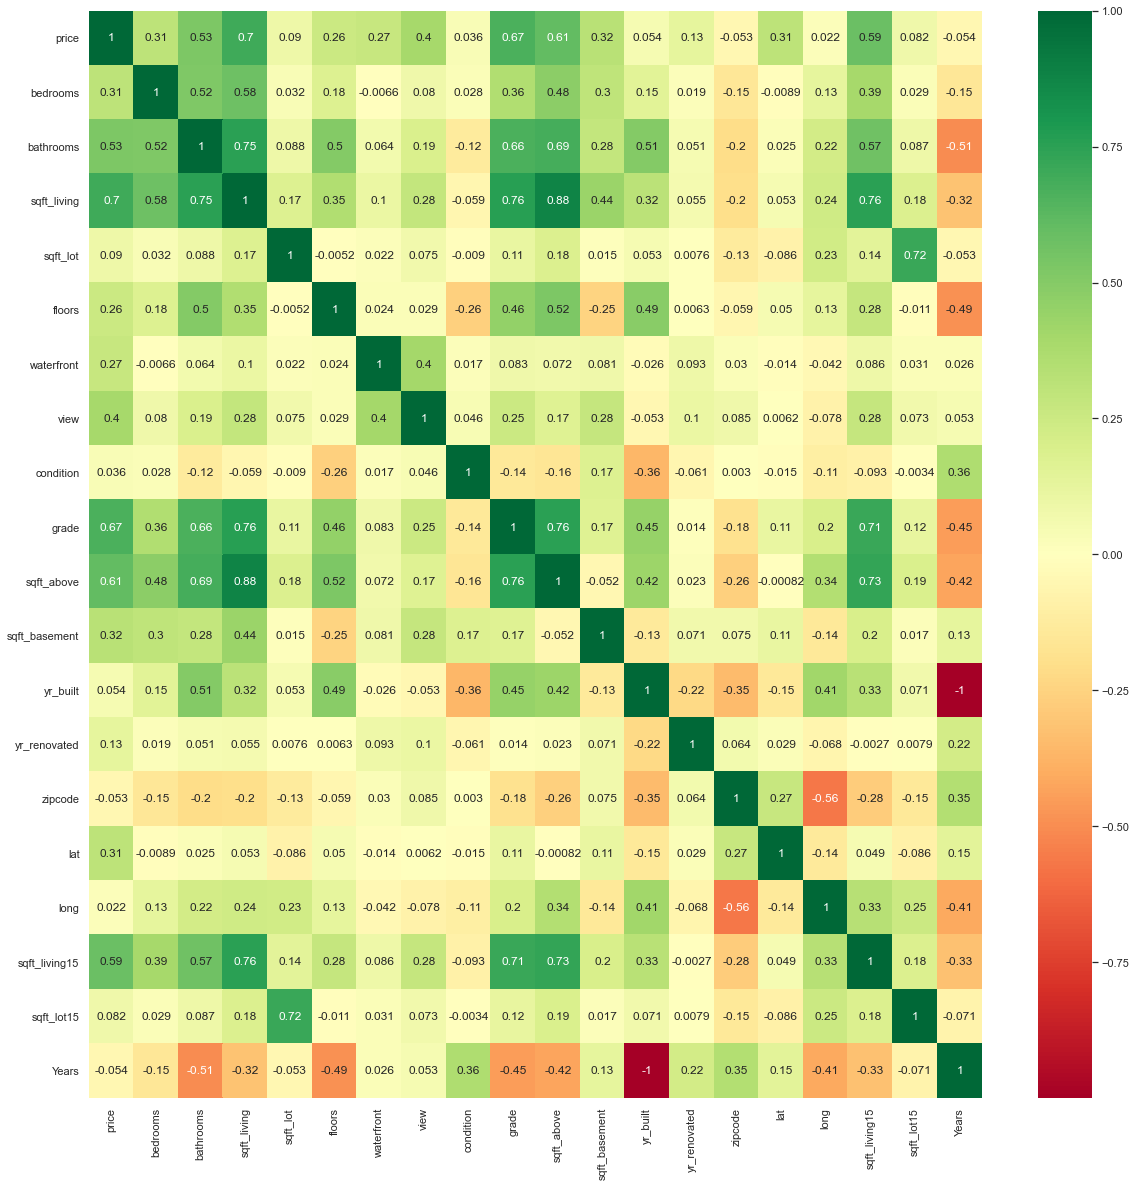

In [20]:
from matplotlib import figure
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
data.drop('yr_built',axis=1,inplace=True)

In [22]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,28


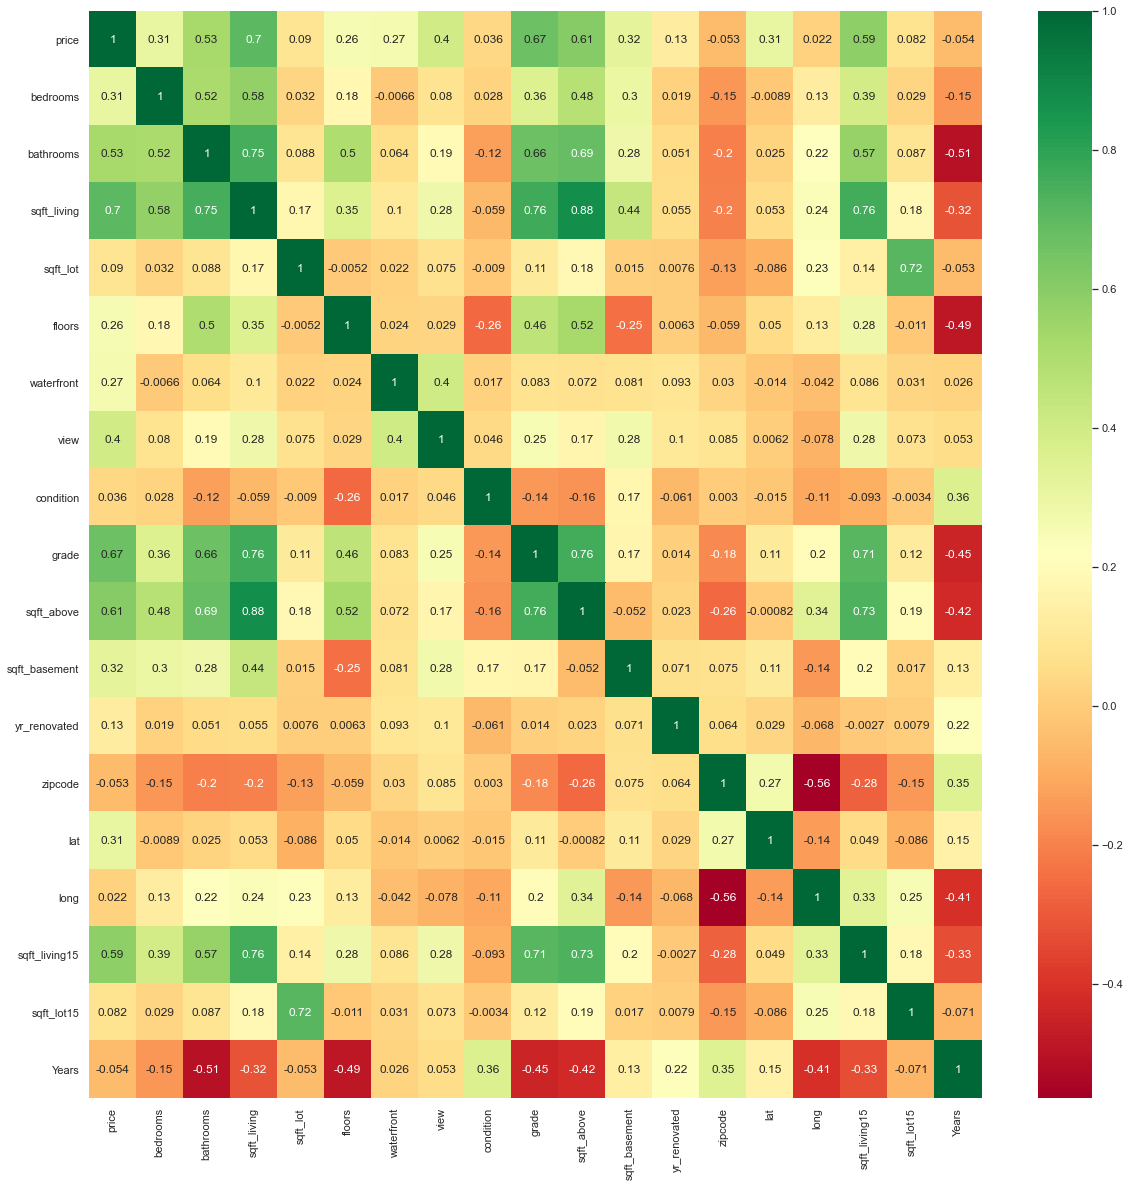

In [23]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Dropping coloumns with high multicolinearity

In [24]:
data.drop('long',axis=1,inplace=True)

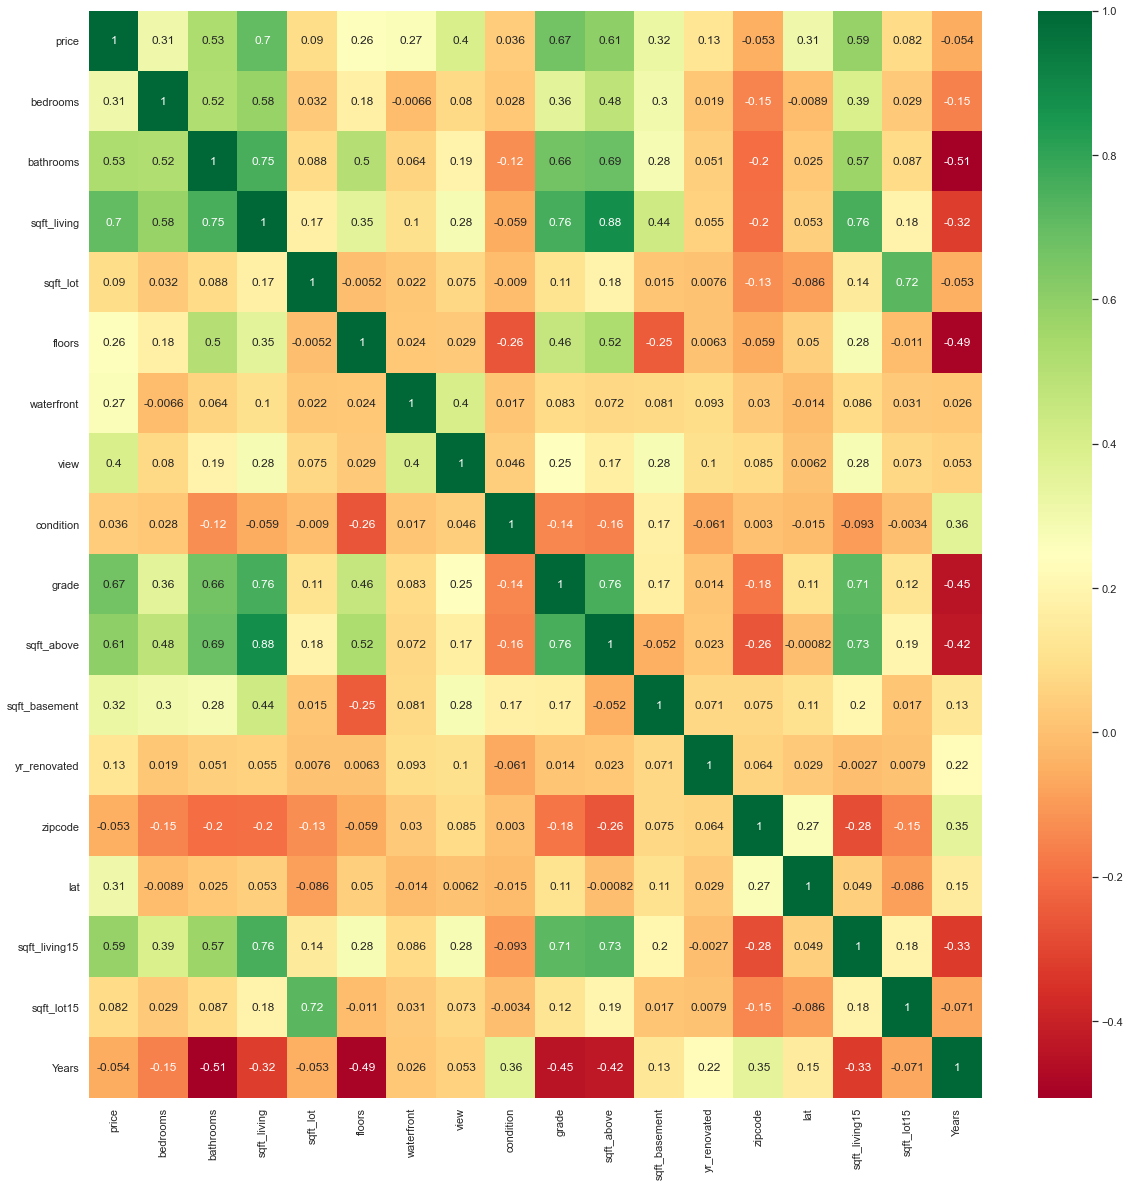

In [25]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
data.drop('bathrooms',axis=1,inplace=True)

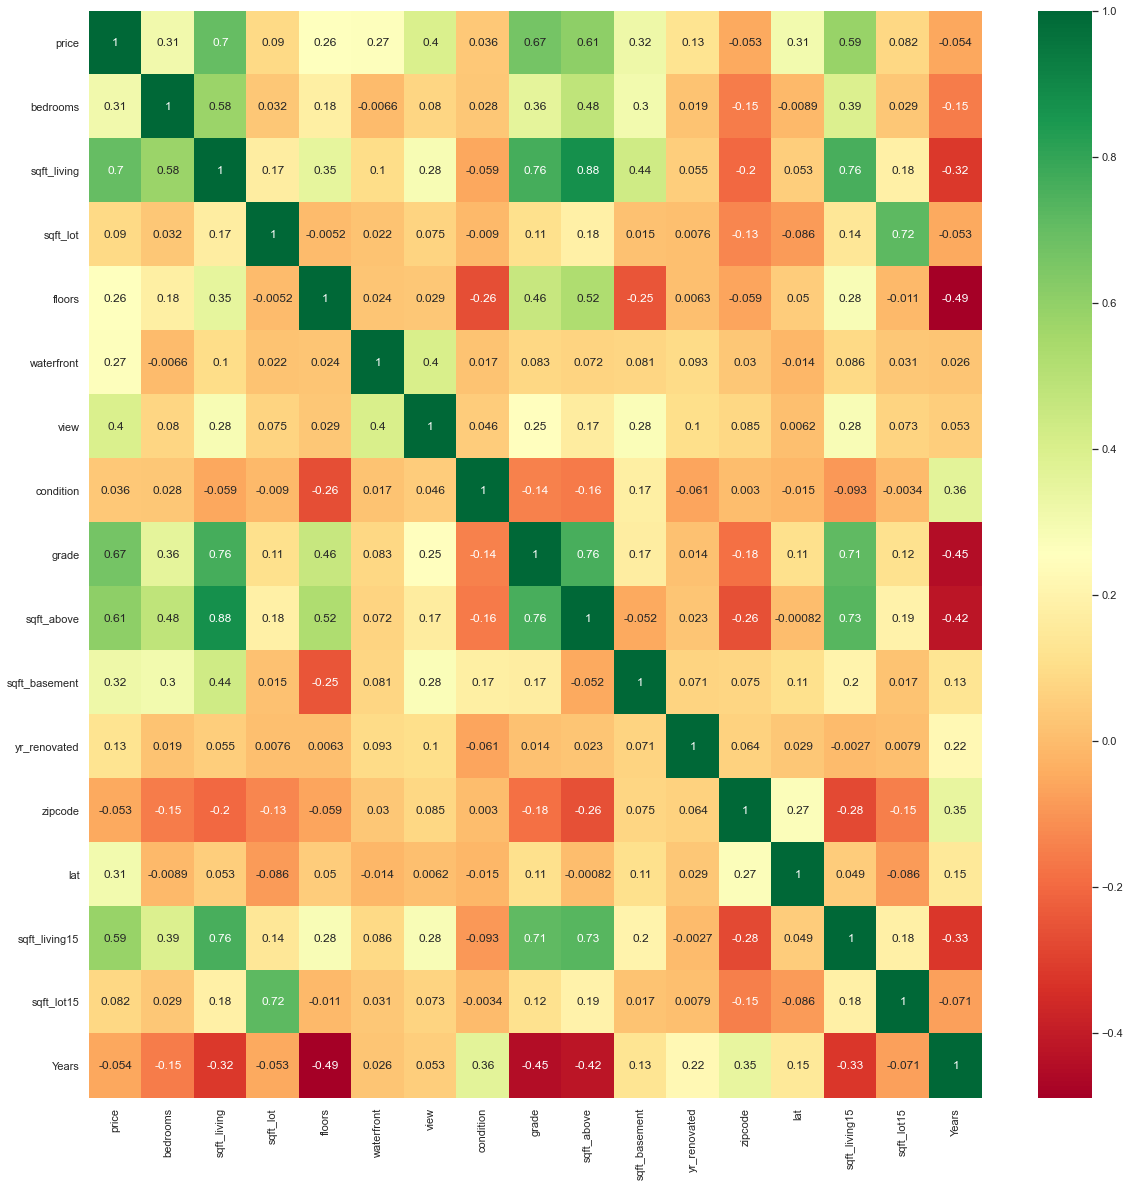

In [27]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [28]:
data.drop('grade',axis=1,inplace=True)
data.drop('sqft_above',axis=1,inplace=True)
data.drop('floors',axis=1,inplace=True)

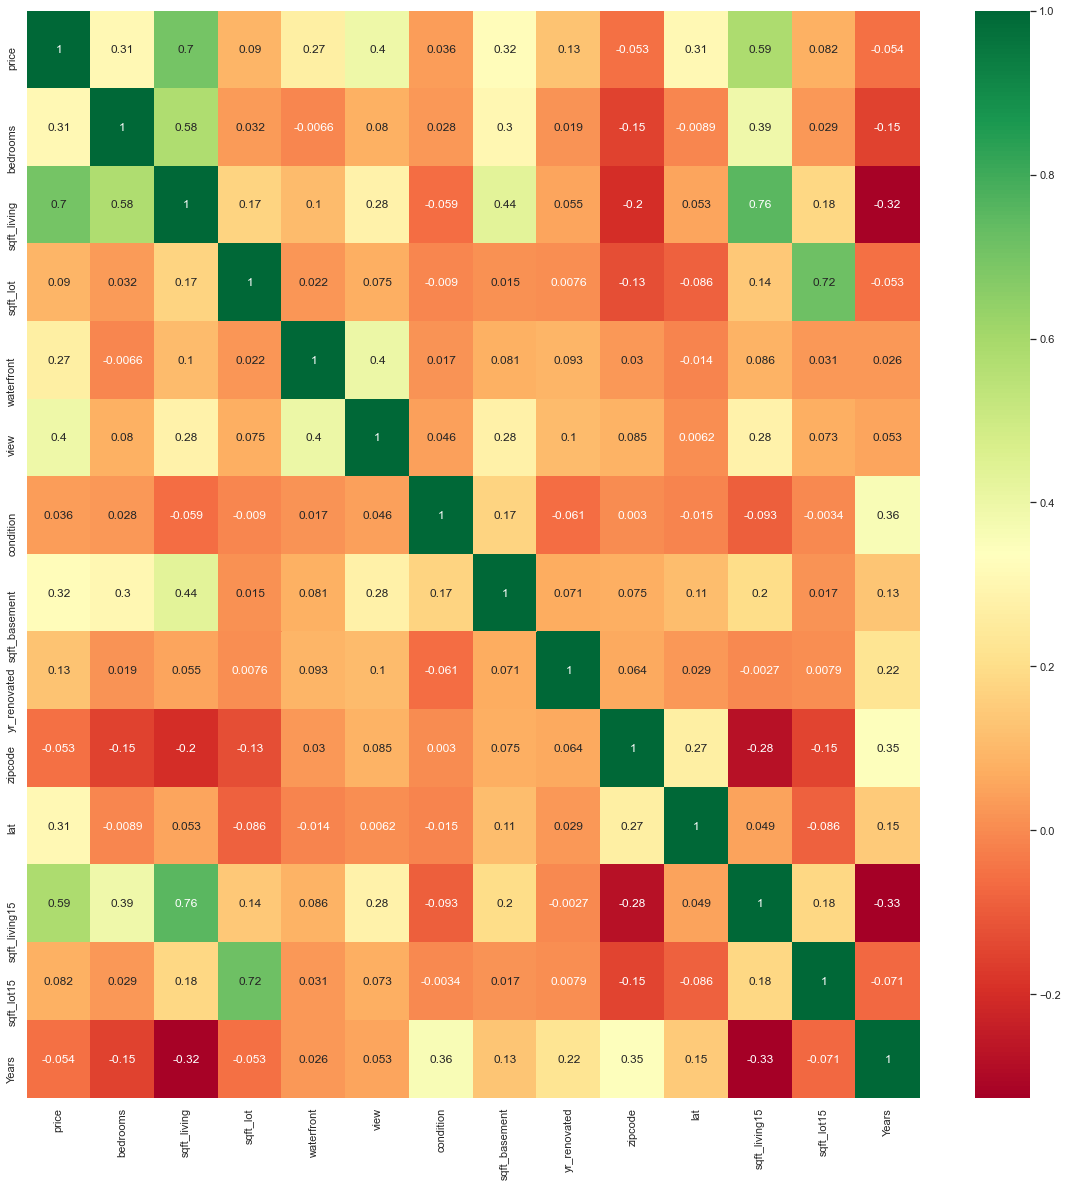

In [29]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
data.drop('sqft_living15',axis=1,inplace=True)
data.drop('sqft_lot15',axis=1,inplace=True)

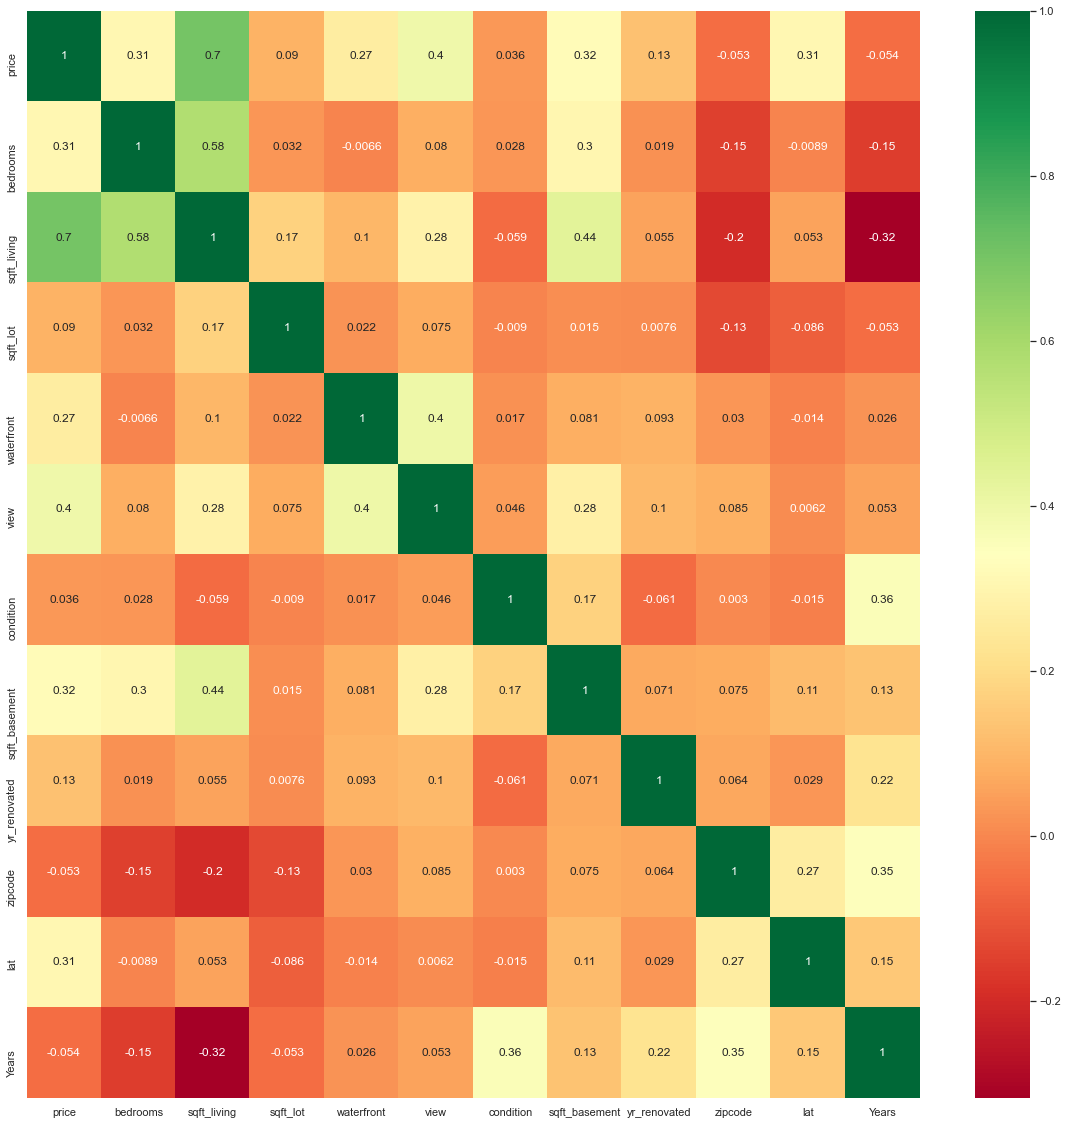

In [31]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

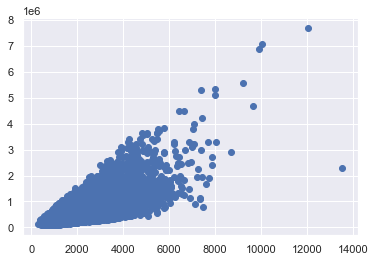

In [32]:
plt.scatter(data['sqft_living'],data['price'])
plt.show()

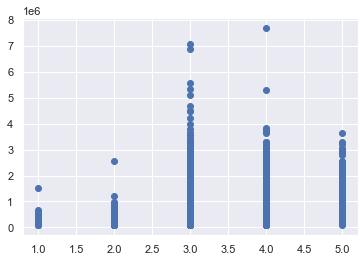

In [33]:
plt.scatter(data['condition'],data['price'])
plt.show()

In [34]:
data.head(10)

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,sqft_basement,yr_renovated,zipcode,lat,Years
0,221900.0,3,1180,5650,0,0,3,0,0,98178,47.5112,59
1,538000.0,3,2570,7242,0,0,3,400,1991,98125,47.7210,63
2,180000.0,2,770,10000,0,0,3,0,0,98028,47.7379,82
3,604000.0,4,1960,5000,0,0,5,910,0,98136,47.5208,49
4,510000.0,3,1680,8080,0,0,3,0,0,98074,47.6168,28
5,1225000.0,4,5420,101930,0,0,3,1530,0,98053,47.6561,13
6,257500.0,3,1715,6819,0,0,3,0,0,98003,47.3097,19
7,291850.0,3,1060,9711,0,0,3,0,0,98198,47.4095,52
8,229500.0,3,1780,7470,0,0,3,730,0,98146,47.5123,55
9,323000.0,3,1890,6560,0,0,3,0,0,98038,47.3684,12


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   waterfront     21613 non-null  int64  
 5   view           21613 non-null  int64  
 6   condition      21613 non-null  int64  
 7   sqft_basement  21613 non-null  int64  
 8   yr_renovated   21613 non-null  int64  
 9   zipcode        21613 non-null  int64  
 10  lat            21613 non-null  float64
 11  Years          21613 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 2.0 MB


## Regression

In [36]:
targets = data['price']
inputs = data.drop(['price'],axis=1)

## Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [38]:
inputs_scaled = scaler.transform(inputs)

## Splitting

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Training

In [40]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_hat = reg.predict(x_train)

## Comparing results

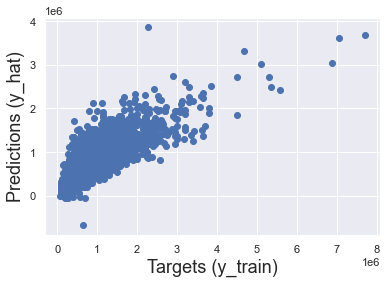

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

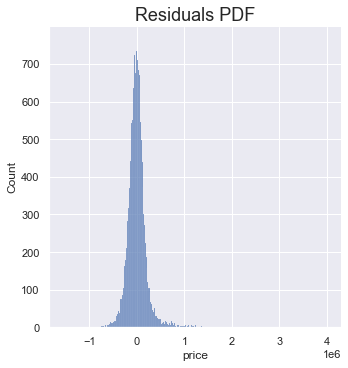

In [43]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [44]:
reg.score(x_train,y_train)

0.651459750476815

## Testing

In [45]:
y_hat_test = reg.predict(x_test)

## Comparing results

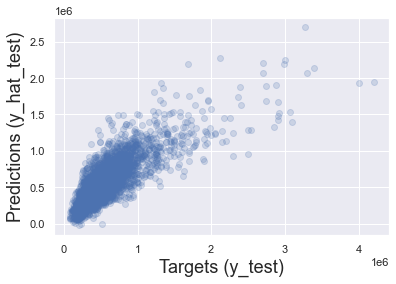

In [46]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [47]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,3.871961e+05
1,4.183803e+05
2,6.351807e+05
3,1.664780e+06
4,6.307400e+05


In [48]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,3.871961e+05,425000.0
1,4.183803e+05,300000.0
2,6.351807e+05,250000.0
3,1.664780e+06,2900000.0
4,6.307400e+05,380000.0
...,...,...
4318,6.574330e+05,519000.0
4319,1.958126e+05,186950.0
4320,6.669111e+05,470000.0
4321,3.683598e+05,582500.0


In [49]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [50]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3.871961e+05,425000.0,3.780388e+04,8.895031
1,4.183803e+05,300000.0,-1.183803e+05,39.460112
2,6.351807e+05,250000.0,-3.851807e+05,154.072264
3,1.664780e+06,2900000.0,1.235220e+06,42.593780
4,6.307400e+05,380000.0,-2.507400e+05,65.984215
...,...,...,...,...
4318,6.574330e+05,519000.0,-1.384330e+05,26.673028
4319,1.958126e+05,186950.0,-8.862596e+03,4.740624
4320,6.669111e+05,470000.0,-1.969111e+05,41.895968
4321,3.683598e+05,582500.0,2.141402e+05,36.762269


In [51]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,4.323000e+03,4.323000e+03,4.323000e+03,4323.000000
mean,5.384594e+05,5.367733e+05,-1.686120e+03,26.560687
std,2.889221e+05,3.494213e+05,2.032418e+05,23.986289
min,-2.099681e+04,7.800000e+04,-8.552656e+05,0.040150
25%,3.397230e+05,3.200000e+05,-1.072230e+05,9.490322
50%,4.892421e+05,4.500000e+05,-1.065394e+04,20.599436
75%,6.779062e+05,6.500000e+05,7.796182e+04,36.650233
max,2.694954e+06,4.208000e+06,2.263691e+06,196.109752


In [52]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
3973,750198.67,750500.00,301.33,0.04
3159,685547.88,685900.00,352.12,0.05
453,257330.51,257500.00,169.49,0.07
2327,279799.80,280000.00,200.20,0.07
2171,720475.57,719950.00,-525.57,0.07
...,...,...,...,...
683,690051.06,250000.00,-440051.06,176.02
357,720265.99,260000.00,-460265.99,177.03
1827,733740.21,262500.00,-471240.21,179.52
2025,838202.26,289275.00,-548927.26,189.76


In [53]:
df_pf['Accuracy%']=abs(100-df_pf['Difference%'])
df_pf

,Prediction,Target,Residual,Difference%,Accuracy%
0,387196.12,425000.00,37803.88,8.90,91.10
1,418380.34,300000.00,-118380.34,39.46,60.54
2,635180.66,250000.00,-385180.66,154.07,54.07
3,1664780.37,2900000.00,1235219.63,42.59,57.41
4,630740.02,380000.00,-250740.02,65.98,34.02
...,...,...,...,...,...
4318,657433.01,519000.00,-138433.01,26.67,73.33
4319,195812.60,186950.00,-8862.60,4.74,95.26
4320,666911.05,470000.00,-196911.05,41.90,58.10
4321,368359.78,582500.00,214140.22,36.76,63.24


In [54]:
df_pf.shape

(4323, 5)

In [55]:
tsum=0
for i in df_pf['Accuracy%']:
    tsum+=i

In [56]:
avg_acc=tsum/df_pf.shape[0]
avg_acc

74.50605590198104

## Conclusion

We conclude that we successfully built a model for predicting house prices with an avg. accuracy of 74.5%